In [1]:
import socnet as sn
import networkx as nx
import pickle
import holoviews as hv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import numpy as np
import datetime
import dateutil.parser

from scipy.optimize import minimize, fmin_l_bfgs_b
from scipy.stats.stats import pearsonr

# import coreness
# hv.extension('bokeh')
# %opts Graph [width=400 height=400]

In [2]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

## Grafo
<img src='./youtubeegg.png'/>

In [3]:
try:
    g = pickle.load(open('graph.p', 'rb'))
except:
    g = sn.load_graph('./collector/output.gml', has_pos=False)
    pickle.dump(g, open('graph.p', 'wb'))

for n in g.nodes:
    if ('country' not in g.nodes[n]):
        g.nodes[n]['country'] = None
    if ('publishedAt' not in g.nodes[n]):
        g.nodes[n]['publishedAt'] = None
        
    g.nodes[n]['viewCount'] = int(g.nodes[n]['viewCount'])
    g.nodes[n]['subscriberCount'] = int(g.nodes[n]['subscriberCount'])
    g.nodes[n]['videoCount'] = int(g.nodes[n]['videoCount'])
    if g.nodes[n]['publishedAt'] != None:
        g.nodes[n]['publishedAt'] = dateutil.parser.parse(g.nodes[n]['publishedAt'][:-1]).timestamp()

In [4]:
g.remove_edges_from(nx.selfloop_edges(g))

In [5]:
#sn.show_graph(g, nlab=False)

In [6]:
in_degree = sorted([(g.nodes[k], v) for k, v in dict(g.in_degree()).items()], key=lambda x: -x[1])
# s = [g.nodes[x[0]] for x in s if g.nodes[x[0]]['country'] == 'BR']
in_degree

[({'color': (255, 255, 255),
   'commentCount': '0',
   'counterId': 956,
   'country': None,
   'hiddenSubscriberCount': 0,
   'pos': (0.5339688413982051, 0.3292912282625936),
   'publishedAt': 1145034449.0,
   'subscriberCount': 17726175,
   'title': 'Vevo',
   'topics': {'n0': 'music'},
   'videoCount': 1552,
   'viewCount': 549779903,
   'visited': 1},
  25),
 ({'color': (255, 255, 255),
   'commentCount': '0',
   'counterId': 1475,
   'country': None,
   'hiddenSubscriberCount': 0,
   'pos': (0.13541765653438587, 0.8278394288222638),
   'publishedAt': 1277240596.0,
   'subscriberCount': 354843,
   'title': 'Elgato Gaming',
   'topics': {'n0': 'gaming', 'n1': 'technology', 'n2': 'lifestyle'},
   'videoCount': 153,
   'viewCount': 6547153,
   'visited': 1},
  24),
 ({'color': (255, 255, 255),
   'commentCount': '0',
   'counterId': 2043,
   'country': 'GB',
   'hiddenSubscriberCount': 0,
   'pos': (0.3926043641733174, 0.5710534713746201),
   'publishedAt': 1271075965.0,
   'subscrib

In [7]:
def cost(c, A):
    row = np.matrix(c)
    print('a')

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

In [ ]:
# cor = coreness(g)
# cor
# nx.to_numpy_matrix(g)
write_coreness(g)
# write_coreness(g)

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [10]:
outdegrees = g.out_degree()
for k, v in outdegrees:
    g.nodes[k]["outdegrees"] = v
    
indegrees = g.in_degree()
for k, v in indegrees:
    g.nodes[k]["indegrees"] = v
    
bw = nx.betweenness_centrality(g)
for k,v in bw.items():
    g.nodes[k]["betweenness"] = v

closeness = nx.closeness_centrality(g)
for k,v in closeness.items():
    g.nodes[k]["closeness"] = v


In [167]:
outdegrees = g.degree()
for k, v in outdegrees:
    g.nodes[k]["degree"] = v

In [11]:
# bw = nx.betweenness_centrality(g)
# betweenness = sorted([(g.nodes[k], v) for k, v in bw.items()], key=lambda x: -x[1])

### Kindness

In [77]:
def kindness(cid):
    own_subs = int(g.nodes[cid]['subscriberCount'])
    kindness = 0
    neighbors = list(nx.neighbors(g, cid))
    if (len(neighbors) == 0):
        return 0
    
    neighbor_subs = [int(g.nodes[n]['subscriberCount']) for n in neighbors]
    for ns in neighbor_subs:
        if (ns < 10):
            continue
        kindness += own_subs/ns
    kindness /= len(neighbors)
    return kindness

MAX_KINDNESS = 0
for n in g.nodes:
    g.nodes[n]['kindness'] = kindness(n)
    if g.nodes[n]['kindness'] > MAX_KINDNESS:
        MAX_KINDNESS = g.nodes[n]['kindness']

for n in g.nodes:
    g.nodes[n]['kindness'] /= MAX_KINDNESS

In [78]:
k = sorted([(g.nodes[k],g.nodes[k]['kindness']) for k in g.nodes], key=lambda x: -x[1])
k_br = sorted([(g.nodes[k],g.nodes[k]['kindness']) for k in g.nodes if g.nodes[k]['country'] == 'BR'], key=lambda x: -x[1])
k_br

[({'betweenness': 0.0006506892404037674,
   'closeness': 0.007838477308807443,
   'color': (255, 255, 255),
   'commentCount': '0',
   'counterId': 2558,
   'country': 'BR',
   'hiddenSubscriberCount': 0,
   'indegrees': 2,
   'kindness': 0.028209145291022444,
   'outdegrees': 21,
   'pos': (0.5309357628230355, 0.5038837415916801),
   'publishedAt': 1454867846.0,
   'subscriberCount': 2633115,
   'title': 'Hoje e dia de Marias',
   'topics': {'n0': 'hobby', 'n1': 'lifestyle'},
   'videoCount': 569,
   'viewCount': 515461324,
   'visited': 1},
  0.028209145291022444),
 ({'betweenness': 0.0001524824848835057,
   'closeness': 0.010117651704941872,
   'color': (255, 255, 255),
   'commentCount': '0',
   'counterId': 762,
   'country': 'BR',
   'hiddenSubscriberCount': 0,
   'indegrees': 2,
   'kindness': 0.027940423536504742,
   'outdegrees': 12,
   'pos': (0.5069389617622548, 0.5278203256471768),
   'publishedAt': 1326331667.0,
   'subscriberCount': 1109162,
   'title': 'SanInPlay',
   't

In [168]:
df = pd.DataFrame({})

for n in g.nodes:
    df = df.append({
        'title': g.nodes[n]['title'],
        'country': g.nodes[n]['country'],
        'publishedAt': g.nodes[n]['publishedAt'],
        'viewCount': g.nodes[n]['viewCount'],
        'subscriberCount': g.nodes[n]['subscriberCount'],
        'videoCount': g.nodes[n]['videoCount'],
        'topics': g.nodes[n]['topics'],
        'kindness': g.nodes[n]['kindness'],
        'outdegrees': g.nodes[n]['outdegrees'],
        'indegrees': g.nodes[n]['indegrees'],
        'degree':g.nodes[n]['degree'],
        'betweenness': g.nodes[n]['betweenness'],
        'closeness': g.nodes[n]['closeness'],
    }, ignore_index=True)

In [80]:
df.describe()

,betweenness,closeness,indegrees,kindness,outdegrees,subscriberCount,videoCount,viewCount
count,8434.000000,8434.000000,8434.000000,8434.000000,8434.000000,8.434000e+03,8434.000000,8.434000e+03
mean,0.000202,0.011552,1.867204,0.001294,1.867204,1.127200e+06,700.256581,2.976974e+08
std,0.001293,0.002628,1.748889,0.017229,4.746400,2.730057e+06,3290.192979,1.076929e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.009879,1.000000,0.000000,0.000000,4.248425e+04,60.000000,2.909434e+06
50%,0.000000,0.011647,1.000000,0.000000,0.000000,2.428710e+05,210.500000,2.916712e+07
75%,0.000000,0.013458,2.000000,0.000000,0.000000,1.013607e+06,602.000000,1.679527e+08
max,0.026978,0.020469,25.000000,1.000000,100.000000,7.287236e+07,143419.000000,2.590377e+10


In [14]:
sorted_df = df.sort_values(by='subscriberCount', ascending=False)
sorted_df[sorted_df.country == 'BR']

,betweenness,closeness,country,indegrees,kindness,outdegrees,publishedAt,subscriberCount,title,topics,videoCount,viewCount
5769,2.393338e-02,0.017930,BR,7.0,0.000398,5.0,1.14776e+09,27815339.0,Felipe Neto,"{'n2': 'humor', 'n0': 'entertainment', 'n1': '...",1441.0,5.323839e+09
579,1.666501e-05,0.015925,BR,3.0,0.000312,3.0,1.40678e+09,21109795.0,Luccas Neto,"{'n2': 'entertainment', 'n3': 'hobby', 'n0': '...",550.0,4.639199e+09
3922,4.003985e-03,0.010971,BR,14.0,0.000490,23.0,1.32909e+09,20877027.0,rezendeevil,"{'n2': 'entertainment', 'n0': 'role-playing vi...",6845.0,7.221062e+09
8319,4.821793e-04,0.011471,BR,3.0,0.000285,4.0,1.37808e+09,19148707.0,Voce Sabia?,"{'n0': 'entertainment', 'n1': 'lifestyle'}",681.0,2.062269e+09
2633,1.876837e-03,0.011050,BR,17.0,0.001220,19.0,1.31795e+09,15780628.0,AuthenticGames,"{'n0': 'role-playing video game', 'n1': 'gaming'}",3516.0,6.318297e+09
7660,0.000000e+00,0.000000,BR,0.0,0.004220,7.0,1.33153e+09,15056101.0,Porta dos Fundos,"{'n2': 'movies', 'n0': 'entertainment', 'n1': ...",947.0,4.356892e+09
380,2.267461e-04,0.011007,BR,12.0,0.000317,10.0,1.35554e+09,12164492.0,AM3NlC,"{'n0': 'role-playing video game', 'n1': 'gaming'}",3789.0,3.319216e+09
7024,1.686893e-05,0.015925,BR,3.0,0.000707,5.0,1.50067e+09,11831548.0,Irmaos Neto,"{'n0': 'humor', 'n1': 'entertainment'}",198.0,1.058501e+09
8031,3.240718e-03,0.011587,BR,7.0,0.000224,7.0,1.22195e+09,11656290.0,Canal Nostalgia,"{'n0': 'movies', 'n1': 'entertainment'}",314.0,9.487899e+08
4385,4.204721e-05,0.012037,BR,1.0,0.001432,3.0,1.15375e+09,11409853.0,Manual do Mundo,{'n0': 'lifestyle'},1400.0,1.947152e+09


In [88]:
us_df = df.loc[df["country"] == "BR"]

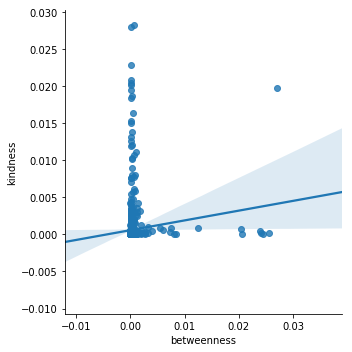

In [89]:
x = sns.lmplot(data=us_df, x='betweenness', y='kindness')
# x.set_yscale('log')

/home/rapha/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



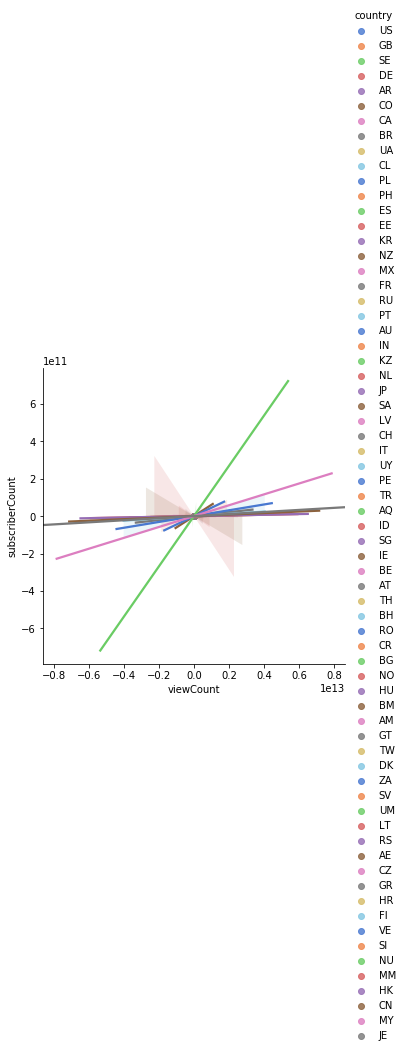

In [16]:
y = sns.lmplot(data=df, x='viewCount', y='subscriberCount', hue="country", palette=sns.color_palette("muted"))

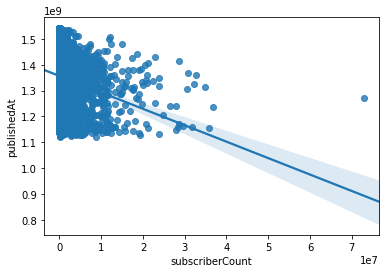

In [126]:
z = sns.regplot(data=df, x='subscriberCount', y='publishedAt')

In [76]:
df['kindness'].corr(df['betweenness'])

0.024004974501257433

In [128]:
df['viewCount'].corr(df['subscriberCount'])

0.7610870534177299

In [129]:
df['publishedAt'].astype(float).corr(df['subscriberCount'])

-0.1669796549579717

In [138]:
df['kindness'].corr(df['closeness'])

0.018404340446056884

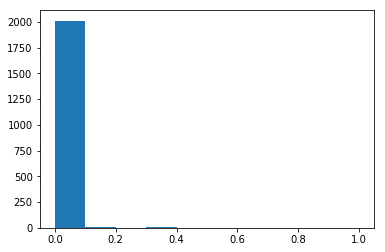

In [167]:
bet = [g.nodes[x]['kindness'] for x in g.nodes if g.nodes[x]['kindness'] > 0]
hist = plt.hist(bet, bins=10)
xdata = [(l + r) / 2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

# # Calcula uma regressão linear sobre os logaritmos dos dados.
# reg = ss.linregress(np.log(xdata), np.log(ydata))

# # Plota uma exponencial da curva de regressão.
# plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

# Exibe o gráfico.
# plt.title('distribuição de quantidade de citações')
plt.show()

In [69]:
# null_od = df.loc[(df["subscriberCount"] > 1000000) & (df["outdegrees"] == 0)]
# null_od.groupby('country').count()
kind_base = df.loc[(df["kindness"] > 0)]
kind_base

,betweenness,closeness,country,indegrees,kindness,outdegrees,publishedAt,subscriberCount,title,topics,videoCount,viewCount
3,3.709605e-05,0.015524,None,2.0,0.000529,3.0,1.28529e+09,2399349.0,Tpindell,"{'n0': 'entertainment', 'n1': 'gaming'}",399.0,3.496005e+08
6,9.626703e-04,0.012689,GB,1.0,0.003231,9.0,1.30937e+09,3878992.0,TheGamingLemon,"{'n0': 'gaming', 'n1': 'role-playing video game'}",659.0,6.321449e+08
13,3.372380e-05,0.007283,AR,1.0,0.000284,2.0,1.40073e+09,4741566.0,VIRAL,"{'n0': 'lifestyle', 'n1': 'entertainment'}",603.0,1.094667e+09
22,8.975129e-04,0.012642,CA,4.0,0.000082,10.0,1.36338e+09,1280195.0,MrTLexify,"{'n0': 'action game', 'n1': 'gaming'}",945.0,3.820790e+08
25,1.535244e-07,0.010192,UA,5.0,0.002263,24.0,1.19773e+09,1564146.0,,"{'n2': 'tv shows', 'n3': 'music', 'n0': 'enter...",9486.0,9.990606e+08
27,5.933748e-03,0.015504,US,7.0,0.000083,9.0,1.19433e+09,4794698.0,Household Hacker,"{'n2': 'food', 'n0': 'lifestyle', 'n1': 'techn...",479.0,8.074943e+08
29,5.742726e-04,0.012937,US,6.0,0.006787,19.0,1.38132e+09,6584804.0,Peppa Pig - Official Channel,"{'n0': 'movies', 'n1': 'entertainment'}",314.0,2.283550e+09
38,2.410689e-04,0.015323,None,5.0,0.002432,9.0,1.1679e+09,4600385.0,blndsundoll4mj,"{'n0': 'lifestyle', 'n1': 'fashion'}",2196.0,1.448173e+09
39,1.824991e-06,0.009604,None,1.0,0.000032,2.0,1.32459e+09,7511519.0,Roma and Diana,"{'n2': 'music', 'n0': 'hobby', 'n1': 'lifestyle'}",33.0,1.440924e+08
40,5.054351e-05,0.006921,CL,1.0,0.000581,5.0,1.31382e+09,1010390.0,iviiween,"{'n0': 'lifestyle', 'n1': 'entertainment'}",156.0,8.749802e+07


In [ ]:
bet = [g.nodes[x]['kindness'] for x in g.nodes if g.nodes[x]['kindness'] > 0]
hist = plt.hist(bet, bins=10)
xdata = [(l + r) / 2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

# # Calcula uma regressão linear sobre os logaritmos dos dados.
# reg = ss.linregress(np.log(xdata), np.log(ydata))

# # Plota uma exponencial da curva de regressão.
# plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

# Exibe o gráfico.
# plt.title('distribuição de quantidade de citações')
plt.show()

In [20]:
test = nx.k_core(g)

In [33]:
from pprint import pprint
for n in test.nodes:
    print(test.nodes[n]['subscriberCount'], test.nodes[n]['title'])

1961323 Alex Flores
2580932 Andrea Zuniga
1047075 Tavo Betancourt
1753625 Malcriado
2525802 Lizbeth Rodriguez
1072489 Carolina Diaz
28602699 Badabun
2018495 KimShantal
1400516 Queen Buenrostro


In [8]:
nx.core_number(g)

{'UCsDdQUPa4NvPvf2f00E5zfw': 2,
 'UCLFFdNaytZDDSR7JGXFnTiA': 1,
 'UCBWhJHVuxtxbeRp_PAdfn2w': 2,
 'UCjkUsjn8wf7pMfj31_4YnWA': 2,
 'UCB4Rm7m0PxZ1W_mYwz2gUig': 1,
 'UCiB8cQpQm8v1CjOi9VmAB_g': 2,
 'UCoaWFCFBDCXS030uimjZAkw': 6,
 'UCFrD70VdlgQvlMD04cGsn0g': 2,
 'UCE8CeczHxvbWVxCQyzBGPiQ': 1,
 'UCEjWwpHX71w6aELHNT9lFwQ': 1,
 'UCKVV1b71dtciZ_APO0BqRcw': 2,
 'UCjnJMbNunuOFeUdrw7j1iew': 1,
 'UCAcomub-SUAB9ylPiai_5SQ': 1,
 'UCUXqYwTCR6R3Wr-FkLTD4AQ': 1,
 'UCUBuQif8Zupe4T0_KbS_pZw': 1,
 'UCw-rZCOg-lvI_RNb5Hv7pzA': 1,
 'UCjXgGxaZ2NrwOdVhODyXLPQ': 1,
 'UC62IIuaPmV-KeuYmEaIZ0eQ': 1,
 'UCU6Xdctu2CsQp3NhyyrW3Dw': 5,
 'UCECJDeK0MNapZbpaOzxrUPA': 7,
 'UCFqaprvZ2K5JOULCvr18NTQ': 2,
 'UCrb7XNZEwPheovXjgbkH5vg': 7,
 'UCtm8vkLl55Nzt6WmC3MJvdA': 1,
 'UCI4I6ldZ0jWe7vXpUVeVcpg': 5,
 'UCqWYoHfqLmwBVESpVbaVk3g': 1,
 'UCWq1xltHB2fDe6YkYoOrryg': 1,
 'UCAOtE1V7Ots4DjM8JLlrYgg': 6,
 'UCI75eRPEIvr802Ma8YLGuFg': 2,
 'UCYZKDmmS5NNIaiD6hlNWh7Q': 1,
 'UCOcLfTvfHaZYAZAK1xTdeQQ': 1,
 'UCTlWiQTrL0rqxCjCt6H-a9g': 1,
 'UC24yf

### Kindness x betweenness regression

In [130]:
slope, intercept, r_value, p_value, std_err = ss.linregress(x=df["betweenness"],y=df["kindness"])
line = slope*df["betweenness"]+intercept
slope, intercept, r_value, p_value, std_err

(0.31983470724569923,
 0.001228809327340851,
 0.02400497450125736,
 0.027487007567903426,
 0.14505539208839227)

Text(0, 0.5, 'Betweenness')

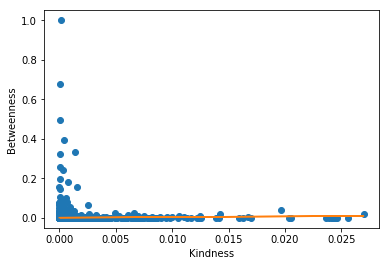

In [131]:
plt.plot(df["betweenness"],df["kindness"],'o', df["betweenness"], line)
plt.xlabel("Kindness")
plt.ylabel("Betweenness")

### Kindness x closeness regression

In [184]:
slope, intercept, r_value, p_value, std_err = ss.linregress(x=df["subscriberCount"],y=df["kindness"])
line = slope*df["subscriberCount"]+intercept
slope, intercept, r_value, p_value, std_err### Kindness x betweenness regression

(7.758652072361741e-10,
 0.0004189773555076657,
 0.1229405364220024,
 9.130619360656662e-30,
 6.820540207449513e-11)

Text(0, 0.5, 'Kindness')

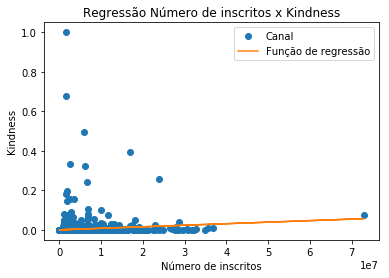

In [191]:
plt.plot(df["subscriberCount"],df["kindness"],'o', df["subscriberCount"], line)
plt.legend(["Canal", "Função de regressão"])
plt.title("Regressão Número de inscritos x Kindness")
plt.xlabel("Número de inscritos")
plt.ylabel("Kindness")

In [179]:
slope, intercept, r_value, p_value, std_err = ss.linregress(x=df["subscriberCount"],y=df["kindness"])
line = slope*df["indegrees"]+intercept
slope, intercept, r_value, p_value, std_err### Kindness x betweenness regression

(7.758652072361741e-10,
 0.0004189773555076657,
 0.1229405364220024,
 9.130619360656662e-30,
 6.820540207449513e-11)

In [165]:
df["closeness"].corr(df["subscriberCount"])

0.1400045923666803

In [ ]:
#  'title': g.nodes[n]['title'],
#         'country': g.nodes[n]['country'],
#         'publishedAt': g.nodes[n]['publishedAt'],
#         'viewCount': g.nodes[n]['viewCount'],
#         'subscriberCount': g.nodes[n]['subscriberCount'],
#         'videoCount': g.nodes[n]['videoCount'],
#         'topics': g.nodes[n]['topics'],
#         'kindness': g.nodes[n]['kindness'],
#         'outdegrees': g.nodes[n]['outdegrees'],
#         'indegrees': g.nodes[n]['indegrees'],
#         'betweenness': g.nodes[n]['betweenness'],
#         'closeness': g.nodes[n]['closeness'],

### Indicações estrangeiras BR e US e indicações entre si

In [145]:
num_br = len(df.loc[df["country"] == "BR"])
br_indica_estrangeiro = 0
for n in g.nodes:
    if(g.nodes[n]["country"] == "BR"):
        neighbors = list(nx.neighbors(g, n))
        neighbor_country = [g.nodes[n]['country'] for n in neighbors]
        indica = False
        for country in neighbor_country:
            if country != "BR" and country != None:
                indica = True
        if indica:
            br_indica_estrangeiro += 1

In [150]:
br_indica_estrangeiro, num_br

(53, 1071)

In [151]:
num_us = len(df.loc[df["country"] == "US"])
us_indica_estrangeiro = 0
for n in g.nodes:
    if(g.nodes[n]["country"] == "US"):
        neighbors = list(nx.neighbors(g, n))
        neighbor_country = [g.nodes[n]['country'] for n in neighbors]
        indica = False
        for country in neighbor_country:
            if country != "US" and country != None:
                indica = True
        if indica:
            us_indica_estrangeiro += 1

In [152]:
us_indica_estrangeiro, num_us

(247, 2189)

In [154]:
br_indica_us = 0
for n in g.nodes:
    if(g.nodes[n]["country"] == "BR"):
        neighbors = list(nx.neighbors(g, n))
        neighbor_country = [g.nodes[n]['country'] for n in neighbors]
        indica = False
        for country in neighbor_country:
            if country == "US":
                indica = True
        if indica:
            br_indica_us += 1

In [155]:
br_indica_us

31

In [158]:
us_indica_br = 0
for n in g.nodes:
    if(g.nodes[n]["country"] == "US"):
        neighbors = list(nx.neighbors(g, n))
        neighbor_country = [g.nodes[n]['country'] for n in neighbors]
        indica = False
        for country in neighbor_country:
            if country == "BR":
                indica = True
        if indica:
            us_indica_br += 1

In [159]:
us_indica_br

16

#### As inidicações podem ter um peso maior pela naturalidade do youtuber do que pela qualidade do conteúdo, a barreira da linguagem pode ter um peso grande nesta estatística.

In [166]:
g.degree()

DiDegreeView({'UCsDdQUPa4NvPvf2f00E5zfw': 2, 'UCLFFdNaytZDDSR7JGXFnTiA': 1, 'UCBWhJHVuxtxbeRp_PAdfn2w': 2, 'UCjkUsjn8wf7pMfj31_4YnWA': 5, 'UCB4Rm7m0PxZ1W_mYwz2gUig': 1, 'UCiB8cQpQm8v1CjOi9VmAB_g': 2, 'UCoaWFCFBDCXS030uimjZAkw': 10, 'UCFrD70VdlgQvlMD04cGsn0g': 2, 'UCE8CeczHxvbWVxCQyzBGPiQ': 1, 'UCEjWwpHX71w6aELHNT9lFwQ': 1, 'UCKVV1b71dtciZ_APO0BqRcw': 2, 'UCjnJMbNunuOFeUdrw7j1iew': 1, 'UCAcomub-SUAB9ylPiai_5SQ': 1, 'UCUXqYwTCR6R3Wr-FkLTD4AQ': 1, 'UCUBuQif8Zupe4T0_KbS_pZw': 1, 'UCw-rZCOg-lvI_RNb5Hv7pzA': 1, 'UCjXgGxaZ2NrwOdVhODyXLPQ': 1, 'UC62IIuaPmV-KeuYmEaIZ0eQ': 1, 'UCU6Xdctu2CsQp3NhyyrW3Dw': 14, 'UCECJDeK0MNapZbpaOzxrUPA': 14, 'UCFqaprvZ2K5JOULCvr18NTQ': 2, 'UCrb7XNZEwPheovXjgbkH5vg': 29, 'UCtm8vkLl55Nzt6WmC3MJvdA': 1, 'UCI4I6ldZ0jWe7vXpUVeVcpg': 16, 'UCqWYoHfqLmwBVESpVbaVk3g': 1, 'UCWq1xltHB2fDe6YkYoOrryg': 1, 'UCAOtE1V7Ots4DjM8JLlrYgg': 25, 'UCI75eRPEIvr802Ma8YLGuFg': 2, 'UCYZKDmmS5NNIaiD6hlNWh7Q': 1, 'UCOcLfTvfHaZYAZAK1xTdeQQ': 1, 'UCTlWiQTrL0rqxCjCt6H-a9g': 1, 'UC24yfMhHL7ryQhbc_

In [181]:
df

,betweenness,closeness,country,degree,indegrees,kindness,outdegrees,publishedAt,subscriberCount,title,topics,videoCount,viewCount
0,0.000000e+00,0.014261,None,2.0,2.0,0.000000,0.0,1.14887e+09,151424.0,The A.V. Club,"{'n2': 'movies', 'n0': 'entertainment', 'n1': ...",1347.0,2.417567e+07
1,0.000000e+00,0.013259,None,1.0,1.0,0.000000,0.0,1.12218e+09,219363.0,mel,"{'n0': 'lifestyle', 'n1': 'pets'}",386.0,5.871906e+07
2,0.000000e+00,0.013069,US,2.0,2.0,0.000000,0.0,1.42052e+09,881099.0,LXG Design,"{'n0': 'hobby', 'n1': 'lifestyle'}",290.0,1.741814e+08
3,3.709605e-05,0.015524,None,5.0,2.0,0.000529,3.0,1.28529e+09,2399349.0,Tpindell,"{'n0': 'entertainment', 'n1': 'gaming'}",399.0,3.496005e+08
4,0.000000e+00,0.009532,None,1.0,1.0,0.000000,0.0,1.45528e+09,146950.0,/,"{'n2': 'lifestyle', 'n0': 'tv shows', 'n1': 'e...",718.0,6.106463e+07
5,0.000000e+00,0.014904,US,2.0,2.0,0.000000,0.0,1.28083e+09,90239.0,annaleeandjesse,"{'n0': 'lifestyle', 'n1': 'fashion'}",505.0,1.342688e+07
6,9.626703e-04,0.012689,GB,10.0,1.0,0.003231,9.0,1.30937e+09,3878992.0,TheGamingLemon,"{'n0': 'gaming', 'n1': 'role-playing video game'}",659.0,6.321449e+08
7,0.000000e+00,0.010131,SE,1.0,1.0,0.000000,0.0,1.30376e+09,12978.0,KungKimmoMedia,"{'n2': 'motorsport', 'n3': 'sports', 'n0': 've...",180.0,2.669995e+06
8,0.000000e+00,0.014778,US,2.0,2.0,0.000000,0.0,1.42098e+09,96089.0,In Mad's World,{'n0': 'lifestyle'},265.0,9.130451e+06
9,0.000000e+00,0.011750,GB,1.0,1.0,0.000000,0.0,1.30677e+09,102019.0,Gaming Faster than Light!,{'n0': 'gaming'},1723.0,3.014948e+07


In [183]:
len(df["country"].unique())

69